In [1]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
np.set_printoptions(threshold=20)
plt.rcParams["figure.figsize"] = (9,7)

In [10]:
"""
const int ptbin = 5; // inclusive on last bin, inclusive on lower limit, exclusive on upper
static double pt_lo[ptbin] = {5, 10, 20, 40, 5};
static double pt_hi[ptbin] = {10, 20, 40, 60, 60};
const int pt_color[ptbin] = {kGreen+1, kBlue, kViolet, kOrange+1, kRed};

const int etabin = 6; // inclusive on last bin, inclusive on lower limit, exclusive on upper
static double eta_lo[etabin] = {-3.5, -1, 1, -3.5, -1, 0};
static double eta_hi[etabin] = {-1, 1, 3.5, 3.5, 0, 1};
const int eta_color[etabin] = {kGreen+1, kBlue, kViolet, kOrange+1};

 int etabin_pick = 2;
  int ptbin_pick = 1;
  float rl_range_lo = 1E-2;
  float rl_range_hi = 1;

pt.csv per jet normalization range: for 10-20 GeV jet use entries 40 through 80
"""
jetpt_bin_lo = 40
jetpt_bin_hi = 80

Js = [0.25, 0.5, 1, 1.5]
Jnames = ["025", "05", "1", "15"]
systems = ["e+p", "e+C", "e+Au", "e+U"]

# figure urls
base_url = "./analysis"

ep_pythia_url = base_url+"/ep_10_100_pythia8/3d_hists.csv"
ep_pythia_url_jetpt = base_url+"/ep_10_100_pythia8/pt.csv"

ep_urls = [base_url+"/ep_10_100_K0_density_pow"+Jname+"/3d_hists.csv" for Jname in Jnames]
ep_urls_jetpt = [base_url+"/ep_10_100_K0_density_pow"+Jname+"/pt.csv" for Jname in Jnames]

eC_urls = [base_url+"/eC_10_100_K4_density_pow"+Jname+"/3d_hists.csv" for Jname in Jnames]

eAu_urls = [base_url+"/eAu_10_100_K4_density_pow"+Jname+"/3d_hists.csv" for Jname in Jnames]
eAu_urls_jetpt = [base_url+"/eAu_10_100_K4_density_pow"+Jname+"/pt.csv" for Jname in Jnames]

eU_urls = [base_url+"/eU_10_100_K4_density_pow"+Jname+"/3d_hists.csv" for Jname in Jnames]

eAu0p01_urls = [None, base_url+"/eAu_10_100_K0p01_density_pow05/3d_hists.csv", base_url+"/eAu_10_100_K0p01_density_pow1/3d_hists.csv", base_url+"/eAu_10_100_K0p01_density_pow15/3d_hists.csv"]
eAu0p01_urls_jetpt = [None, base_url+"/eAu_10_100_K0p01_density_pow05/pt.csv", base_url+"/eAu_10_100_K0p01_density_pow1/pt.csv", base_url+"/eAu_10_100_K0p01_density_pow15/pt.csv"]
eAu0p1_urls = [None, base_url+"/eAu_10_100_K0p1_density_pow05/3d_hists.csv", base_url+"/eAu_10_100_K0p1_density_pow1/3d_hists.csv", base_url+"/eAu_10_100_K0p1_density_pow15/3d_hists.csv"]
eAu0p1_urls_jetpt = [None, base_url+"/eAu_10_100_K0p1_density_pow05/pt.csv", base_url+"/eAu_10_100_K0p1_density_pow1/pt.csv", base_url+"/eAu_10_100_K0p1_density_pow15/pt.csv"]
eAu2_urls = [None, base_url+"/eAu_10_100_K2_density_pow05/3d_hists.csv", None, base_url+"/eAu_10_100_K2_density_pow15/3d_hists.csv"]
eAu10_urls = [None, base_url+"/eAu_10_100_K10_density_pow05/3d_hists.csv", None, base_url+"/eAu_10_100_K10_density_pow15/3d_hists.csv"]
eAu100_urls = [None, base_url+"/eAu_10_100_K100_density_pow05/3d_hists.csv", base_url+"/eAu_10_100_K100_density_pow1/3d_hists.csv", base_url+"/eAu_10_100_K100_density_pow15/3d_hists.csv"]
eAu100_urls_jetpt = [None, base_url+"/eAu_10_100_K100_density_pow05/pt.csv", base_url+"/eAu_10_100_K100_density_pow1/pt.csv", base_url+"/eAu_10_100_K100_density_pow15/pt.csv"]
eAu_norad_urls = [base_url+"/eAu_10_100_K4_density_norad_pow"+Jname+"/3d_hists.csv" for Jname in Jnames]

Qss = ["0", "0p05", "0p1", "0p2", "0p3", "0p5"]
toy_base_url = "./toy_model_kstudies"
ep_toy_model_urls = [toy_base_url+"/Qs"+Qs+"/3d_hists.csv" for Qs in Qss]
ep_toy_model_urls_jetpt = [toy_base_url+"/Qs"+Qs+"/pt.csv" for Qs in Qss]
print(ep_toy_model_urls)

system_urls = [ep_urls, eC_urls, eAu_urls, eU_urls]

for i in range(len(system_urls)):
  for j in range(len(Js)):
    print(systems[i] + "\t J=" + str(Js[j]) + "\t URL:\t" + system_urls[i][j])

print()
print("K dependence, e+Au")
for i in range(len(eAu_urls)):
  if eAu2_urls[i] is not None:
    print(systems[2] + ", K=0.01\t J=" + str(Js[i]) + "\t URL:\t" + eAu0p01_urls[i])
for i in range(len(eAu_urls)):
  if eAu2_urls[i] is not None:
    print(systems[2] + ", K=0.1\t J=" + str(Js[i]) + "\t URL:\t" + eAu0p1_urls[i])
for i in range(len(eAu_urls)):
  if eAu2_urls[i] is not None:
    print(systems[2] + ", K=2\t J=" + str(Js[i]) + "\t URL:\t" + eAu2_urls[i])
for i in range(len(eAu_urls)):
  if eAu10_urls[i] is not None:
    print(systems[2] + ", K=10\t J=" + str(Js[i]) + "\t URL:\t" + eAu10_urls[i])
for i in range(len(eAu_urls)):
  if eAu10_urls[i] is not None:
    print(systems[2] + ", K=100\t J=" + str(Js[i]) + "\t URL:\t" + eAu100_urls[i])

print()
print("radiation effects turned off, only collisional broadening present")
for j in [0,2]:
    print(systems[2] + "\t J=" + str(Js[j]) + "\t URL:\t" + eAu_norad_urls[j])


# Lauren's colors
L_colors = ['red', 'darkorange', 'gold', 'limegreen', 'green', 'deepskyblue', 'blue', 'black']



['./toy_model_kstudies/Qs0/3d_hists.csv', './toy_model_kstudies/Qs0p05/3d_hists.csv', './toy_model_kstudies/Qs0p1/3d_hists.csv', './toy_model_kstudies/Qs0p2/3d_hists.csv', './toy_model_kstudies/Qs0p3/3d_hists.csv', './toy_model_kstudies/Qs0p5/3d_hists.csv']
e+p	 J=0.25	 URL:	./analysis/ep_10_100_K0_density_pow025/3d_hists.csv
e+p	 J=0.5	 URL:	./analysis/ep_10_100_K0_density_pow05/3d_hists.csv
e+p	 J=1	 URL:	./analysis/ep_10_100_K0_density_pow1/3d_hists.csv
e+p	 J=1.5	 URL:	./analysis/ep_10_100_K0_density_pow15/3d_hists.csv
e+C	 J=0.25	 URL:	./analysis/eC_10_100_K4_density_pow025/3d_hists.csv
e+C	 J=0.5	 URL:	./analysis/eC_10_100_K4_density_pow05/3d_hists.csv
e+C	 J=1	 URL:	./analysis/eC_10_100_K4_density_pow1/3d_hists.csv
e+C	 J=1.5	 URL:	./analysis/eC_10_100_K4_density_pow15/3d_hists.csv
e+Au	 J=0.25	 URL:	./analysis/eAu_10_100_K4_density_pow025/3d_hists.csv
e+Au	 J=0.5	 URL:	./analysis/eAu_10_100_K4_density_pow05/3d_hists.csv
e+Au	 J=1	 URL:	./analysis/eAu_10_100_K4_density_pow1/3d_h

[[1.10113e-04 2.02264e-05 5.00000e-02 ... 1.57080e-01 0.00000e+00
  0.00000e+00]
 [1.10113e-04 2.02264e-05 5.00000e-02 ... 1.57080e-01 0.00000e+00
  0.00000e+00]
 [1.10113e-04 2.02264e-05 5.00000e-02 ... 1.57080e-01 0.00000e+00
  0.00000e+00]
 ...
 [9.15882e-01 1.68236e-01 9.50000e-01 ... 1.57080e-01 2.48448e+01
  6.43209e-02]
 [9.15882e-01 1.68236e-01 9.50000e-01 ... 1.57080e-01 2.72621e+01
  6.19097e-02]
 [9.15882e-01 1.68236e-01 9.50000e-01 ... 1.57080e-01 3.00971e+01
  6.43047e-02]]
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]
[0.0785398 0.235619  0.392699  0.549779  0.706858  0.863938  1.02102
 1.1781    1.33518   1.49226  ]
[13.9841 13.9781 13.9627 ... 24.8448 27.2621 30.0971]


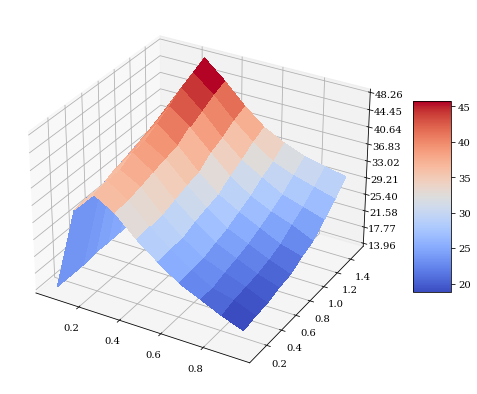

In [13]:
# example usage for e+Au J=1.5 K=4

data = np.loadtxt(eAu_urls[3], delimiter=",", dtype=float)
[RL_center, RL_width, xi_center, xi_width, phi_center, phi_width, eAu4_15, eAu4_15_err] = np.transpose(data)
print(data)

RL_set = data[len(data)-1][0] #highest RL value

xi = np.unique(xi_center)
phi = np.unique(phi_center)
eAu_15 = np.transpose(data[data[:,0]==RL_set])[6]

print(xi)
print(phi)
print(eAu_15)

X, Y = np.meshgrid(xi, phi)
eAu_15 = np.reshape(eAu_15, (len(xi), len(phi))).T

# Plot the surface.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, eAu_15, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

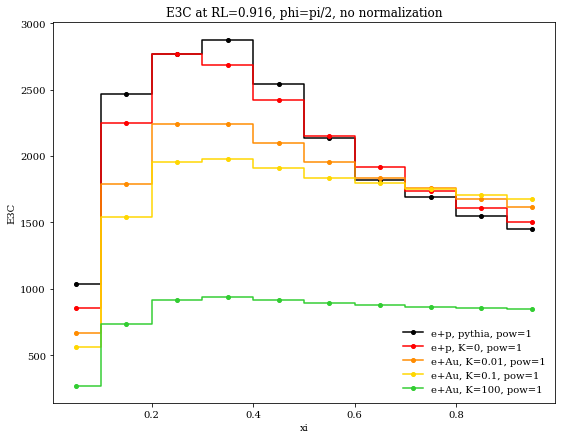

In [ ]:
# slicing e+Au J=1.5 at RL=1, phi=pi/2 and comparing curve across K=2,4,10

def get_rel_norm(binwidth, center, baseline, upper_edge=50):
  int_num = np.dot(binwidth[:upper_edge], baseline[:upper_edge])
  int_denom = np.dot(binwidth[:upper_edge], center[:upper_edge])
  return np.divide(int_num, int_denom, out=np.zeros_like(int_num), where=int_denom!=0)

def slice_set(url):
  data = np.loadtxt(url, delimiter=",", dtype=float)
  [RL_center, RL_width, xi_center, xi_width, phi_center, phi_width, eAu_15, eAu_15_err] = np.transpose(data)

  RL_set = data[len(data)-1][0] #highest RL value
  xi = np.unique(xi_center)
  phi = np.unique(phi_center)
  eAu_15 = np.transpose(data[data[:,0]==RL_set])[6]
  eAu_15 = np.reshape(eAu_15, (len(xi), len(phi))).T

  return eAu_15[eAu_15.shape[0]-1], xi, xi_width[:len(xi)]

pow_index = 2
ep_pythia, _, _ = slice_set(ep_pythia_url)
ep_15, _, _ = slice_set(ep_urls[pow_index])
eAu0p01_15, _, _ = slice_set(eAu0p01_urls[pow_index])
eAu0p1_15, _, _ = slice_set(eAu0p1_urls[pow_index])
#eAu2_15, _, _ = slice_set(eAu2_urls[pow_index])
#eAu4_15, _, _ = slice_set(eAu_urls[pow_index])
eAu100_15, center, width = slice_set(eAu100_urls[pow_index])
#eAu10_15, center, width = slice_set(eAu10_urls[pow_index])

ep_pythia = ep_pythia * ep_15[2] / ep_pythia[2]

# normalize to eAu4
upper_edge = 3
#ep_15 = get_rel_norm(width, ep_15, ep_15, upper_edge=upper_edge) * ep_15
#eAu0p01_15 = get_rel_norm(width, eAu0p01_15, ep_15, upper_edge=upper_edge) * eAu0p01_15
#eAu0p1_15 = get_rel_norm(width, eAu0p1_15, ep_15, upper_edge=upper_edge) * eAu0p1_15
#eAu2_15 = get_rel_norm(width, eAu2_15, ep_15, upper_edge=upper_edge) * eAu2_15
#eAu10_15 = get_rel_norm(width, eAu10_15, ep_15, upper_edge=upper_edge) * eAu10_15
#eAu100_15 = get_rel_norm(width, eAu100_15, ep_15, upper_edge=upper_edge) * eAu100_15


plt.rcParams["font.family"] = "serif"

plt.step(center, ep_pythia, marker='o',where='mid',color="black", ms = '4',label="e+p, pythia, pow=1")

plt.step(center, ep_15, marker='o',where='mid',color=L_colors[0], ms = '4',label="e+p, K=0, pow="+str(Js[pow_index]))
plt.step(center, eAu0p01_15, marker='o',where='mid',color=L_colors[1], ms = '4',label="e+Au, K=0.01, pow="+str(Js[pow_index]))
plt.step(center, eAu0p1_15, marker='o',where='mid',color=L_colors[2], ms = '4',label="e+Au, K=0.1, pow="+str(Js[pow_index]))
#plt.step(center, eAu2_15, marker='o',where='mid',color=L_colors[3], ms = '4',label="e+Au, K=2, pow="+str(Js[pow_index]))
#plt.step(center, eAu4_15, marker='o',where='mid',color=L_colors[4], ms = '4',label="e+Au, K=4, pow="+str(Js[pow_index]))
#plt.step(center, eAu10_15, marker='o',where='mid',color=L_colors[5], ms = '4',label="e+Au, K=10, pow="+str(Js[pow_index]))
plt.step(center, eAu100_15, marker='o',where='mid',color=L_colors[3], ms = '4',label="e+Au, K=100, pow="+str(Js[pow_index]))

#plt.xscale('log')
#plt.xlim(0, 0.05)
#plt.ylim(14,55)
plt.xlabel('xi')
plt.ylabel('E3C')
plt.legend(loc='lower right', fontsize=10, frameon=False)
plt.title("E3C at RL=0.916, phi=pi/2, no normalization")

axes = plt.gca()
#axes.tick_params(axis='both',labelsize=14)
#axes.set_xticks([0.05,0.10,0.50,1])
#axes.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#axes.spines["left"].set_linewidth(2)
#axes.spines["right"].set_linewidth(2)
#axes.spines["bottom"].set_linewidth(2)
#axes.spines["top"].set_linewidth(2)
fig = plt.gcf()
#fig.set_size_inches(18.5/2, 10.5/2)
#fig.savefig('fig1a.pdf')
plt.show()

3389.0
343142.0


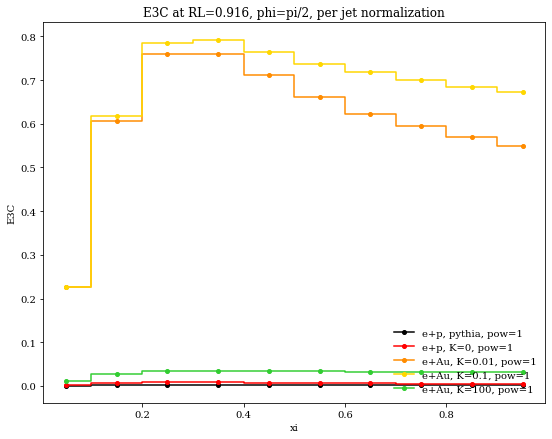

In [19]:
# slicing e+Au J=1.5 at RL=1, phi=pi/2 and comparing curve across K=2,4,10

def get_rel_norm(binwidth, center, baseline, upper_edge=50):
  int_num = np.dot(binwidth[:upper_edge], baseline[:upper_edge])
  int_denom = np.dot(binwidth[:upper_edge], center[:upper_edge])
  return np.divide(int_num, int_denom, out=np.zeros_like(int_num), where=int_denom!=0)

def slice_set(url):
  data = np.loadtxt(url, delimiter=",", dtype=float)
  [RL_center, RL_width, xi_center, xi_width, phi_center, phi_width, eAu_15, eAu_15_err] = np.transpose(data)

  RL_set = data[len(data)-1][0] #highest RL value
  xi = np.unique(xi_center)
  phi = np.unique(phi_center)
  eAu_15 = np.transpose(data[data[:,0]==RL_set])[6]
  eAu_15 = np.reshape(eAu_15, (len(xi), len(phi))).T

  return eAu_15[eAu_15.shape[0]-1], xi, xi_width[:len(xi)]

def get_n_jets(url_jetpt):
  data = np.loadtxt(url_jetpt, delimiter=",", dtype=float)
  forward_jets = np.transpose(data)[6]
  return np.sum(forward_jets[jetpt_bin_lo:jetpt_bin_hi])


pow_index = 2
ep_pythia, _, _ = slice_set(ep_pythia_url)
ep_15, _, _ = slice_set(ep_urls[pow_index])
eAu0p01_15, _, _ = slice_set(eAu0p01_urls[pow_index])
eAu0p1_15, _, _ = slice_set(eAu0p1_urls[pow_index])
#eAu2_15, _, _ = slice_set(eAu2_urls[pow_index])
#eAu4_15, _, _ = slice_set(eAu_urls[pow_index])
eAu100_15, center, width = slice_set(eAu100_urls[pow_index])
#eAu10_15, center, width = slice_set(eAu10_urls[pow_index])

# normalize to number of jets
ep_pythia = ep_pythia/get_n_jets(ep_pythia_url_jetpt)
print(get_n_jets(ep_pythia_url_jetpt))
ep_15 = ep_15/get_n_jets(ep_urls_jetpt[pow_index])
print(get_n_jets(ep_urls_jetpt[pow_index]))
eAu0p01_15 = eAu0p01_15/get_n_jets(eAu0p01_urls_jetpt[pow_index])
eAu0p1_15 = eAu0p1_15/get_n_jets(eAu0p1_urls_jetpt[pow_index])
eAu100_15 = eAu100_15/get_n_jets(eAu100_urls_jetpt[pow_index])

plt.rcParams["font.family"] = "serif"

plt.step(center, ep_pythia, marker='o',where='mid',color="black", ms = '4',label="e+p, pythia, pow=1")

plt.step(center, ep_15, marker='o',where='mid',color=L_colors[0], ms = '4',label="e+p, K=0, pow="+str(Js[pow_index]))
plt.step(center, eAu0p01_15, marker='o',where='mid',color=L_colors[1], ms = '4',label="e+Au, K=0.01, pow="+str(Js[pow_index]))
plt.step(center, eAu0p1_15, marker='o',where='mid',color=L_colors[2], ms = '4',label="e+Au, K=0.1, pow="+str(Js[pow_index]))
plt.step(center, eAu100_15, marker='o',where='mid',color=L_colors[3], ms = '4',label="e+Au, K=100, pow="+str(Js[pow_index]))

#plt.xscale('log')
#plt.xlim(0, 0.05)
#plt.ylim(14,55)
plt.xlabel('xi')
plt.ylabel('E3C')
plt.legend(loc='lower right', fontsize=10, frameon=False)
plt.title("E3C at RL=0.916, phi=pi/2, per jet normalization")

axes = plt.gca()
#axes.tick_params(axis='both',labelsize=14)
#axes.set_xticks([0.05,0.10,0.50,1])
#axes.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#axes.spines["left"].set_linewidth(2)
#axes.spines["right"].set_linewidth(2)
#axes.spines["bottom"].set_linewidth(2)
#axes.spines["top"].set_linewidth(2)
fig = plt.gcf()
#fig.set_size_inches(18.5/2, 10.5/2)
#fig.savefig('fig1a.pdf')
plt.show()


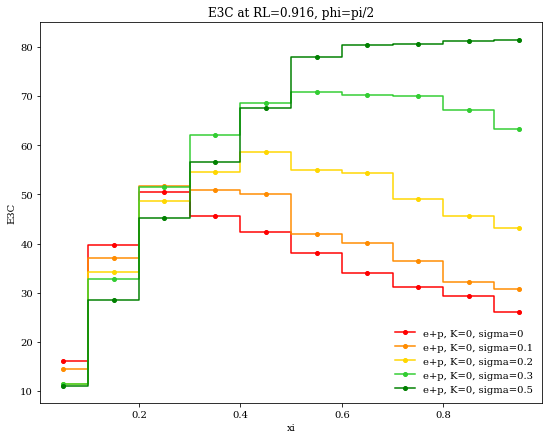

In [5]:
# slicing e+Au J=1.5 at RL=1, phi=pi/2 and comparing curve across K=2,4,10

def get_rel_norm(binwidth, center, baseline, upper_edge=50):
  int_num = np.dot(binwidth[:upper_edge], baseline[:upper_edge])
  int_denom = np.dot(binwidth[:upper_edge], center[:upper_edge])
  return np.divide(int_num, int_denom, out=np.zeros_like(int_num), where=int_denom!=0)

def slice_set(url):
  data = np.loadtxt(url, delimiter=",", dtype=float)
  [RL_center, RL_width, xi_center, xi_width, phi_center, phi_width, eAu_15, eAu_15_err] = np.transpose(data)

  RL_set = data[len(data)-1][0] #highest RL value
  xi = np.unique(xi_center)
  phi = np.unique(phi_center)
  eAu_15 = np.transpose(data[data[:,0]==RL_set])[6]
  eAu_15 = np.reshape(eAu_15, (len(xi), len(phi))).T

  return eAu_15[eAu_15.shape[0]-1], xi, xi_width[:len(xi)]

ep_Qs0, _, _ = slice_set(ep_toy_model_urls[0])
ep_Qs0p05, _, _ = slice_set(ep_toy_model_urls[1])
ep_Qs0p1, _, _ = slice_set(ep_toy_model_urls[2])
ep_Qs0p2, _, _ = slice_set(ep_toy_model_urls[3])
ep_Qs0p3, _, _ = slice_set(ep_toy_model_urls[4])
ep_Qs0p5, _, _ = slice_set(ep_toy_model_urls[5])

# normalize to eAu4
upper_edge = 3
#ep_15 = get_rel_norm(width, ep_15, ep_15, upper_edge=upper_edge) * ep_15
#eAu0p01_15 = get_rel_norm(width, eAu0p01_15, ep_15, upper_edge=upper_edge) * eAu0p01_15
#eAu0p1_15 = get_rel_norm(width, eAu0p1_15, ep_15, upper_edge=upper_edge) * eAu0p1_15
#eAu2_15 = get_rel_norm(width, eAu2_15, ep_15, upper_edge=upper_edge) * eAu2_15
#eAu10_15 = get_rel_norm(width, eAu10_15, ep_15, upper_edge=upper_edge) * eAu10_15
#eAu100_15 = get_rel_norm(width, eAu100_15, ep_15, upper_edge=upper_edge) * eAu100_15


plt.rcParams["font.family"] = "serif"

plt.step(center, ep_Qs0, marker='o',where='mid',color=L_colors[0], ms = '4',label="e+p, K=0, sigma=0")
#plt.step(center, ep_Qs0p05, marker='o',where='mid',color=L_colors[1], ms = '4',label="e+p, K=0, Qs=0.05")
plt.step(center, ep_Qs0p1, marker='o',where='mid',color=L_colors[1], ms = '4',label="e+p, K=0, sigma=0.1")
plt.step(center, ep_Qs0p2, marker='o',where='mid',color=L_colors[2], ms = '4',label="e+p, K=0, sigma=0.2")
plt.step(center, ep_Qs0p3, marker='o',where='mid',color=L_colors[3], ms = '4',label="e+p, K=0, sigma=0.3")
plt.step(center, ep_Qs0p5, marker='o',where='mid',color=L_colors[4], ms = '4',label="e+p, K=0, sigma=0.5")

#plt.xscale('log')
#plt.xlim(0, 0.05)
#plt.ylim(14,55)
plt.xlabel('xi')
plt.ylabel('E3C')
plt.legend(loc='lower right', fontsize=10, frameon=False)
plt.title("E3C at RL=0.916, phi=pi/2")
axes = plt.gca()
#axes.tick_params(axis='both',labelsize=14)
#axes.set_xticks([0.05,0.10,0.50,1])
#axes.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#axes.spines["left"].set_linewidth(2)
#axes.spines["right"].set_linewidth(2)
#axes.spines["bottom"].set_linewidth(2)
#axes.spines["top"].set_linewidth(2)
fig = plt.gcf()
#fig.set_size_inches(18.5/2, 10.5/2)
#fig.savefig('fig1a.pdf')
plt.show()


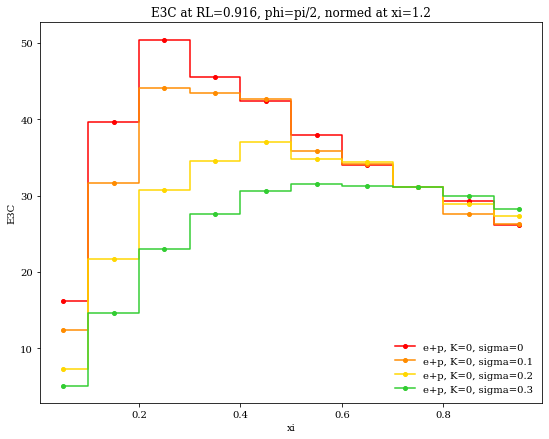

In [6]:
# slicing e+Au J=1.5 at RL=1, phi=pi/2 and comparing curve across K=2,4,10

def get_rel_norm(binwidth, center, baseline, upper_edge=50):
  int_num = np.dot(binwidth[:upper_edge], baseline[:upper_edge])
  int_denom = np.dot(binwidth[:upper_edge], center[:upper_edge])
  return np.divide(int_num, int_denom, out=np.zeros_like(int_num), where=int_denom!=0)

def slice_set(url):
  data = np.loadtxt(url, delimiter=",", dtype=float)
  [RL_center, RL_width, xi_center, xi_width, phi_center, phi_width, eAu_15, eAu_15_err] = np.transpose(data)

  RL_set = data[len(data)-1][0] #highest RL value
  xi = np.unique(xi_center)
  phi = np.unique(phi_center)
  eAu_15 = np.transpose(data[data[:,0]==RL_set])[6]
  eAu_15 = np.reshape(eAu_15, (len(xi), len(phi))).T

  return eAu_15[eAu_15.shape[0]-1], xi, xi_width[:len(xi)]

ep_Qs0, _, _ = slice_set(ep_toy_model_urls[0])
ep_Qs0p05, _, _ = slice_set(ep_toy_model_urls[1])
ep_Qs0p1, _, _ = slice_set(ep_toy_model_urls[2])
ep_Qs0p2, _, _ = slice_set(ep_toy_model_urls[3])
ep_Qs0p3, _, _ = slice_set(ep_toy_model_urls[4])
ep_Qs0p5, _, _ = slice_set(ep_toy_model_urls[5])

# normalize on third to last bin
norm_val = ep_Qs0[len(ep_Qs0)-3]
ep_Qs0p05 = ep_Qs0p05 * norm_val / ep_Qs0p05[len(ep_Qs0p05)-3]
ep_Qs0p1 = ep_Qs0p1 * norm_val / ep_Qs0p1[len(ep_Qs0p1)-3]
ep_Qs0p2 = ep_Qs0p2 * norm_val / ep_Qs0p2[len(ep_Qs0p2)-3]
ep_Qs0p3 = ep_Qs0p3 * norm_val / ep_Qs0p3[len(ep_Qs0p3)-3]


plt.rcParams["font.family"] = "serif"

plt.step(center, ep_Qs0, marker='o',where='mid',color=L_colors[0], ms = '4',label="e+p, K=0, sigma=0")
#plt.step(center, ep_Qs0p05, marker='o',where='mid',color=L_colors[1], ms = '4',label="e+p, K=0, sigma=0.05")
plt.step(center, ep_Qs0p1, marker='o',where='mid',color=L_colors[1], ms = '4',label="e+p, K=0, sigma=0.1")
plt.step(center, ep_Qs0p2, marker='o',where='mid',color=L_colors[2], ms = '4',label="e+p, K=0, sigma=0.2")
plt.step(center, ep_Qs0p3, marker='o',where='mid',color=L_colors[3], ms = '4',label="e+p, K=0, sigma=0.3")
#plt.step(center, ep_Qs0p5, marker='o',where='mid',color=L_colors[4], ms = '4',label="e+p, K=0, Qs=0.5")

#plt.xscale('log')
#plt.xlim(0, 0.05)
#plt.ylim(14,55)
plt.xlabel('xi')
plt.ylabel('E3C')
plt.legend(loc='lower right', fontsize=10, frameon=False)
plt.title("E3C at RL=0.916, phi=pi/2, normed at xi=1.2")
axes = plt.gca()
#axes.tick_params(axis='both',labelsize=14)
#axes.set_xticks([0.05,0.10,0.50,1])
#axes.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#axes.spines["left"].set_linewidth(2)
#axes.spines["right"].set_linewidth(2)
#axes.spines["bottom"].set_linewidth(2)
#axes.spines["top"].set_linewidth(2)
fig = plt.gcf()
#fig.set_size_inches(18.5/2, 10.5/2)
#fig.savefig('fig1a.pdf')
plt.show()


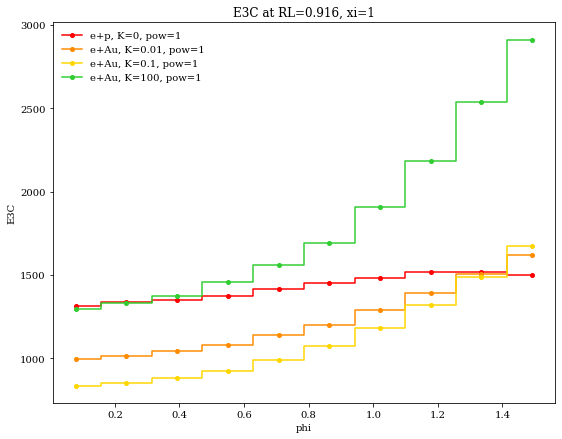

In [7]:
def slice_set(url):
  data = np.loadtxt(url, delimiter=",", dtype=float)
  [RL_center, RL_width, xi_center, xi_width, phi_center, phi_width, eAu_15, eAu_15_err] = np.transpose(data)

  RL_set = data[len(data)-1][0] #highest RL value
  xi = np.unique(xi_center)
  phi = np.unique(phi_center)
  eAu_15 = np.transpose(data[data[:,0]==RL_set])[6]
  eAu_15 = np.reshape(eAu_15, (len(xi), len(phi))).T

  return eAu_15[:,eAu_15.shape[1]-1], phi, phi_width[:len(phi)]

pow_index = 2
ep_15, _, _ = slice_set(ep_urls[pow_index])
eAu0p01_15, _, _ = slice_set(eAu0p01_urls[pow_index])
eAu0p1_15, _, _ = slice_set(eAu0p1_urls[pow_index])
#eAu2_15, _, _ = slice_set(eAu2_urls[pow_index])
#eAu4_15, _, _ = slice_set(eAu_urls[pow_index])
eAu100_15, center, width = slice_set(eAu100_urls[pow_index])
#eAu10_15, center, width = slice_set(eAu10_urls[pow_index])

# normalize to eAu4
upper_edge = 3
#ep_15 = get_rel_norm(width, ep_15, ep_15, upper_edge=upper_edge) * ep_15
#eAu0p01_15 = get_rel_norm(width, eAu0p01_15, ep_15, upper_edge=upper_edge) * eAu0p01_15
#eAu0p1_15 = get_rel_norm(width, eAu0p1_15, ep_15, upper_edge=upper_edge) * eAu0p1_15
#eAu2_15 = get_rel_norm(width, eAu2_15, ep_15, upper_edge=upper_edge) * eAu2_15
#eAu10_15 = get_rel_norm(width, eAu10_15, ep_15, upper_edge=upper_edge) * eAu10_15
eAu100_15 = get_rel_norm(width, eAu100_15, ep_15, upper_edge=upper_edge) * eAu100_15


plt.rcParams["font.family"] = "serif"

plt.step(center, ep_15, marker='o',where='mid',color=L_colors[0], ms = '4',label="e+p, K=0, pow="+str(Js[pow_index]))
plt.step(center, eAu0p01_15, marker='o',where='mid',color=L_colors[1], ms = '4',label="e+Au, K=0.01, pow="+str(Js[pow_index]))
plt.step(center, eAu0p1_15, marker='o',where='mid',color=L_colors[2], ms = '4',label="e+Au, K=0.1, pow="+str(Js[pow_index]))
#plt.step(center, eAu2_15, marker='o',where='mid',color=L_colors[3], ms = '4',label="e+Au, K=2, pow="+str(Js[pow_index]))
#plt.step(center, eAu4_15, marker='o',where='mid',color=L_colors[4], ms = '4',label="e+Au, K=4, pow="+str(Js[pow_index]))
#plt.step(center, eAu10_15, marker='o',where='mid',color=L_colors[5], ms = '4',label="e+Au, K=10, pow="+str(Js[pow_index]))
plt.step(center, eAu100_15, marker='o',where='mid',color=L_colors[3], ms = '4',label="e+Au, K=100, pow="+str(Js[pow_index]))

#plt.xscale('log')
#plt.xlim(0, 0.05)
#plt.ylim(0,16000)
plt.xlabel('phi')
plt.ylabel('E3C')
plt.legend(loc='upper left', fontsize=10, frameon=False)
plt.title("E3C at RL=0.916, xi=1")

axes = plt.gca()
#axes.tick_params(axis='both',labelsize=14)
#axes.set_xticks([0.05,0.10,0.50,1])
#axes.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#axes.spines["left"].set_linewidth(2)
#axes.spines["right"].set_linewidth(2)
#axes.spines["bottom"].set_linewidth(2)
#axes.spines["top"].set_linewidth(2)
fig = plt.gcf()
#fig.set_size_inches(18.5/2, 10.5/2)
#fig.savefig('fig1a.pdf')
plt.show()


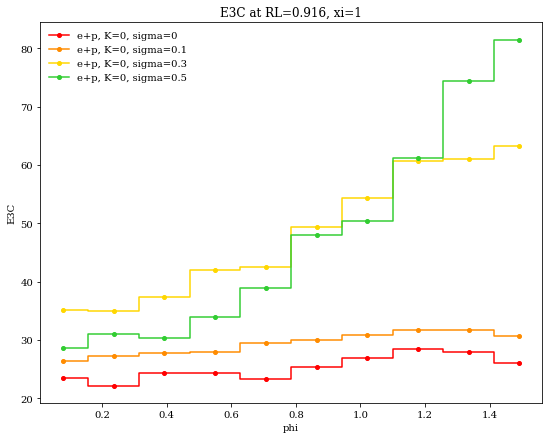

In [8]:
def slice_set(url):
  data = np.loadtxt(url, delimiter=",", dtype=float)
  [RL_center, RL_width, xi_center, xi_width, phi_center, phi_width, eAu_15, eAu_15_err] = np.transpose(data)

  RL_set = data[len(data)-1][0] #highest RL value
  xi = np.unique(xi_center)
  phi = np.unique(phi_center)
  eAu_15 = np.transpose(data[data[:,0]==RL_set])[6]
  eAu_15 = np.reshape(eAu_15, (len(xi), len(phi))).T

  return eAu_15[:,eAu_15.shape[1]-1], phi, phi_width[:len(phi)]

ep_Qs0, _, _ = slice_set(ep_toy_model_urls[0])
ep_Qs0p05, _, _ = slice_set(ep_toy_model_urls[1])
ep_Qs0p1, _, _ = slice_set(ep_toy_model_urls[2])
ep_Qs0p2, _, _ = slice_set(ep_toy_model_urls[3])
ep_Qs0p3, _, _ = slice_set(ep_toy_model_urls[4])
ep_Qs0p5, _, _ = slice_set(ep_toy_model_urls[5])

plt.rcParams["font.family"] = "serif"

plt.step(center, ep_Qs0, marker='o',where='mid',color=L_colors[0], ms = '4',label="e+p, K=0, sigma=0")
#plt.step(center, ep_Qs0p05, marker='o',where='mid',color=L_colors[1], ms = '4',label="e+p, K=0, sigma=0.05")
plt.step(center, ep_Qs0p1, marker='o',where='mid',color=L_colors[1], ms = '4',label="e+p, K=0, sigma=0.1")
plt.step(center, ep_Qs0p3, marker='o',where='mid',color=L_colors[2], ms = '4',label="e+p, K=0, sigma=0.3")
plt.step(center, ep_Qs0p5, marker='o',where='mid',color=L_colors[3], ms = '4',label="e+p, K=0, sigma=0.5")

#plt.xscale('log')
#plt.xlim(0, 0.05)
#plt.ylim(0,16000)
plt.xlabel('phi')
plt.ylabel('E3C')
plt.legend(loc='upper left', fontsize=10, frameon=False)
plt.title("E3C at RL=0.916, xi=1")

axes = plt.gca()
#axes.tick_params(axis='both',labelsize=14)
#axes.set_xticks([0.05,0.10,0.50,1])
#axes.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#axes.spines["left"].set_linewidth(2)
#axes.spines["right"].set_linewidth(2)
#axes.spines["bottom"].set_linewidth(2)
#axes.spines["top"].set_linewidth(2)
fig = plt.gcf()
#fig.set_size_inches(18.5/2, 10.5/2)
#fig.savefig('fig1a.pdf')
plt.show()


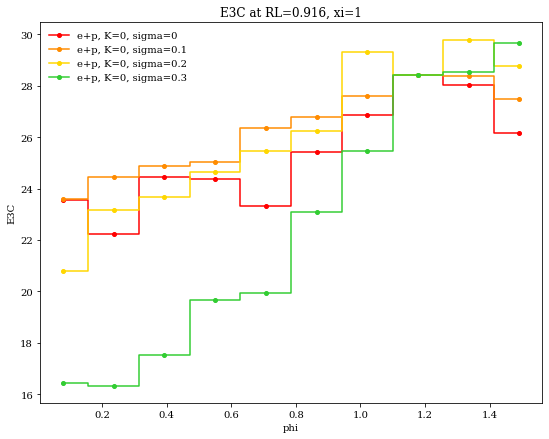

In [9]:
def slice_set(url):
  data = np.loadtxt(url, delimiter=",", dtype=float)
  [RL_center, RL_width, xi_center, xi_width, phi_center, phi_width, eAu_15, eAu_15_err] = np.transpose(data)

  RL_set = data[len(data)-1][0] #highest RL value
  xi = np.unique(xi_center)
  phi = np.unique(phi_center)
  eAu_15 = np.transpose(data[data[:,0]==RL_set])[6]
  eAu_15 = np.reshape(eAu_15, (len(xi), len(phi))).T

  return eAu_15[:,eAu_15.shape[1]-1], phi, phi_width[:len(phi)]

ep_Qs0, _, _ = slice_set(ep_toy_model_urls[0])
ep_Qs0p05, _, _ = slice_set(ep_toy_model_urls[1])
ep_Qs0p1, _, _ = slice_set(ep_toy_model_urls[2])
ep_Qs0p2, _, _ = slice_set(ep_toy_model_urls[3])
ep_Qs0p3, _, _ = slice_set(ep_toy_model_urls[4])
ep_Qs0p5, _, _ = slice_set(ep_toy_model_urls[5])

# normalize on nt to last bin
bin_norm = 3
norm_val = ep_Qs0[len(ep_Qs0)-bin_norm]
ep_Qs0p05 = ep_Qs0p05 * norm_val / ep_Qs0p05[len(ep_Qs0p05)-bin_norm]
ep_Qs0p1 = ep_Qs0p1 * norm_val / ep_Qs0p1[len(ep_Qs0p1)-bin_norm]
ep_Qs0p2 = ep_Qs0p2 * norm_val / ep_Qs0p2[len(ep_Qs0p2)-bin_norm]
ep_Qs0p3 = ep_Qs0p3 * norm_val / ep_Qs0p3[len(ep_Qs0p3)-bin_norm]

plt.rcParams["font.family"] = "serif"

plt.step(center, ep_Qs0, marker='o',where='mid',color=L_colors[0], ms = '4',label="e+p, K=0, sigma=0")
#plt.step(center, ep_Qs0p05, marker='o',where='mid',color=L_colors[1], ms = '4',label="e+p, K=0, sigma=0.05")
plt.step(center, ep_Qs0p1, marker='o',where='mid',color=L_colors[1], ms = '4',label="e+p, K=0, sigma=0.1")
plt.step(center, ep_Qs0p2, marker='o',where='mid',color=L_colors[2], ms = '4',label="e+p, K=0, sigma=0.2")
plt.step(center, ep_Qs0p3, marker='o',where='mid',color=L_colors[3], ms = '4',label="e+p, K=0, sigma=0.3")
#plt.step(center, ep_Qs0p5, marker='o',where='mid',color=L_colors[4], ms = '4',label="e+p, K=0, Qs=0.5")

#plt.xscale('log')
#plt.xlim(0, 0.05)
#plt.ylim(0,16000)
plt.xlabel('phi')
plt.ylabel('E3C')
plt.legend(loc='upper left', fontsize=10, frameon=False)
plt.title("E3C at RL=0.916, xi=1")

axes = plt.gca()
#axes.tick_params(axis='both',labelsize=14)
#axes.set_xticks([0.05,0.10,0.50,1])
#axes.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#axes.spines["left"].set_linewidth(2)
#axes.spines["right"].set_linewidth(2)
#axes.spines["bottom"].set_linewidth(2)
#axes.spines["top"].set_linewidth(2)
fig = plt.gcf()
#fig.set_size_inches(18.5/2, 10.5/2)
#fig.savefig('fig1a.pdf')
plt.show()


./analysis/eAu_10_100_K4_density_pow1/pt.csv
./analysis/eAu_10_100_K4_density_norad_pow1/pt.csv


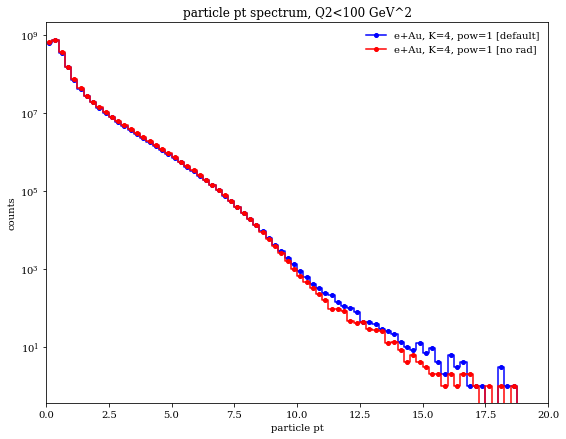

In [10]:
# z spectrum comparison

plt.rcParams["font.family"] = "serif"

# e+Au with rad, K=4, pow=1
url = base_url + "/eAu_10_100_K4_density_pow1/pt.csv"
print(url)
data = np.loadtxt(url, delimiter=",", dtype=float)
[bincenter, binwidth, _, _, _, _, _, _, eAu, eAu_err] = np.transpose(data)

# e+Au with w/o rad, K=4, pow=1
url = base_url + "/eAu_10_100_K4_density_norad_pow1/pt.csv"
print(url)
data = np.loadtxt(url, delimiter=",", dtype=float)
[bincenter, binwidth, _, _, _, _, _, _, eAu_norad, eAu_norad_err] = np.transpose(data)


#print(get_rel_norm(binwidth, eAu, eAu_norad))
#eAu = eAu * get_rel_norm(binwidth, eAu, eAu_norad)

# plotting

plt.step(bincenter, eAu, marker='o',where='mid',color='blue', ms = '4',label="e+Au, K=4, pow=1 [default]")
#plt.errorbar(bincenter, eAu, yerr=eAu_err, fmt='.',color='blue')
plt.step(bincenter, eAu_norad, marker='o',where='mid',color='red', ms = '4',label="e+Au, K=4, pow=1 [no rad]")
#plt.errorbar(bincenter, eAu_norad, yerr=eAu_norad_err, fmt='.',color='red')

plt.yscale('log')
plt.xlim(0, 20)
#plt.ylim(0,16000)
plt.xlabel('particle pt')
plt.ylabel('counts')
plt.legend(loc='upper right', fontsize=10, frameon=False)
plt.title("particle pt spectrum, Q2<100 GeV^2")

axes = plt.gca()
#axes.tick_params(axis='both',labelsize=14)
#axes.set_xticks([0.05,0.10,0.50,1])
#axes.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#axes.spines["left"].set_linewidth(2)
#axes.spines["right"].set_linewidth(2)
#axes.spines["bottom"].set_linewidth(2)
#axes.spines["top"].set_linewidth(2)
fig = plt.gcf()
#fig.set_size_inches(18.5/2, 10.5/2)
#fig.savefig('fig1a.pdf')
plt.show()


# plot the ratio


./analysis/eAu_10_100_K4_density_Q4_pow1/z_nu.csv
[0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085, 0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175, 0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265, 0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355, 0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445, 0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535, 0.545, 0.555, 0.565, 0.575, 0.585, 0.595, 0.605, 0.615, 0.625, 0.635, 0.645, 0.655, 0.665, 0.675, 0.685, 0.695, 0.705, 0.715, 0.725, 0.735, 0.745, 0.755, 0.765, 0.775, 0.785, 0.795, 0.805, 0.815, 0.825, 0.835, 0.845, 0.855, 0.865, 0.875, 0.885, 0.895, 0.905, 0.915, 0.925, 0.935, 0.945, 0.955, 0.965, 0.975, 0.985, 0.995]
100
./analysis/eAu_10_100_K4_density_Q4_norad_pow1/z_nu.csv


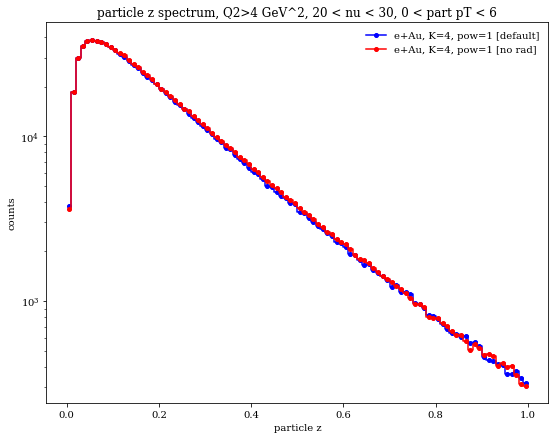

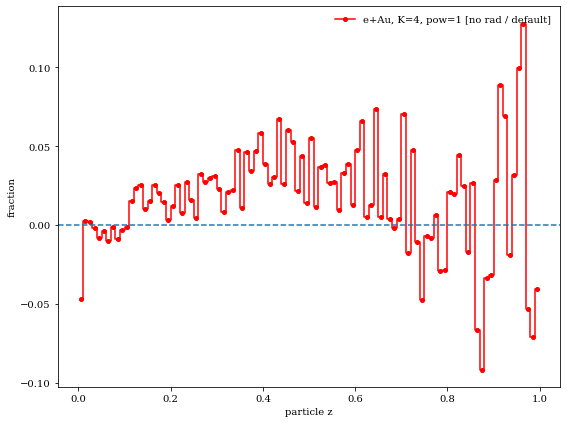

In [11]:
# rad / no rad comparison

# nu selection
nu_lo = 20
nu_hi = 30

plt.rcParams["font.family"] = "serif"

def process_helper(data):
  eAu = []
  this_z = data[0][0]
  this_sum = 0
  for row in data:
    if row[0] == this_z:
      if row[2] > nu_lo and row[2] < nu_hi:
        this_sum += row[20] + row[18] + row[16] # janky pt bin selection
    else:
      this_z = row[0]
      eAu.append(this_sum)
      this_sum = 0
  eAu.append(this_sum)
  return eAu

# e+Au with rad, K=4, pow=1
url = base_url + "/eAu_10_100_K4_density_Q4_pow1/z_nu.csv"
print(url)
data = np.loadtxt(url, delimiter=",", dtype=float)
eAu = process_helper(data)

bincenter = []
for row in data:
  if not row[0] in bincenter:
    bincenter.append(row[0])
print(bincenter)
print(len(bincenter))


# e+Au with w/o rad, K=4, pow=1
url = base_url + "/eAu_10_100_K4_density_Q4_norad_pow1/z_nu.csv"
print(url)
data = np.loadtxt(url, delimiter=",", dtype=float)
eAu_norad = process_helper(data)


#print(get_rel_norm(binwidth, eAu, eAu_norad))
#eAu = eAu * get_rel_norm(binwidth, eAu, eAu_norad)

# plotting

plt.step(bincenter, eAu, marker='o',where='mid',color='blue', ms = '4',label="e+Au, K=4, pow=1 [default]")
#plt.errorbar(bincenter, eAu, yerr=eAu_err, fmt='.',color='blue')
plt.step(bincenter, eAu_norad, marker='o',where='mid',color='red', ms = '4',label="e+Au, K=4, pow=1 [no rad]")
#plt.errorbar(bincenter, eAu_norad, yerr=eAu_norad_err, fmt='.',color='red')

plt.yscale('log')

#plt.yscale('log')
#plt.xlim(0, 20)
#plt.ylim(0,16000)
plt.xlabel('particle z')
plt.ylabel('counts')
plt.legend(loc='upper right', fontsize=10, frameon=False)
plt.title("particle z spectrum, Q2>4 GeV^2, {} < nu < {}, 0 < part pT < 6".format(nu_lo, nu_hi))

axes = plt.gca()
#axes.tick_params(axis='both',labelsize=14)
#axes.set_xticks([0.05,0.10,0.50,1])
#axes.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#axes.spines["left"].set_linewidth(2)
#axes.spines["right"].set_linewidth(2)
#axes.spines["bottom"].set_linewidth(2)
#axes.spines["top"].set_linewidth(2)
fig = plt.gcf()
#fig.set_size_inches(18.5/2, 10.5/2)
#fig.savefig('fig1a.pdf')
plt.show()

plt.step(bincenter, (eAu_norad/np.sum(eAu)) / (eAu/np.sum(eAu)) - 1, marker='o',where='mid',color='red', ms = '4',label="e+Au, K=4, pow=1 [no rad / default]")
plt.axhline(0, linestyle='--')

#plt.yscale('log')
#plt.xlim(0, 20)
#plt.ylim(0,16000)
plt.xlabel('particle z')
plt.ylabel('fraction')
plt.legend(loc='upper right', fontsize=10, frameon=False)

axes = plt.gca()
#axes.tick_params(axis='both',labelsize=14)
#axes.set_xticks([0.05,0.10,0.50,1])
#axes.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#axes.spines["left"].set_linewidth(2)
#axes.spines["right"].set_linewidth(2)
#axes.spines["bottom"].set_linewidth(2)
#axes.spines["top"].set_linewidth(2)
fig = plt.gcf()
#fig.set_size_inches(18.5/2, 10.5/2)
#fig.savefig('fig1a.pdf')
plt.show()
